# SQLAlchemy Homework - Surfs Up!

In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Step 1 - Climate Analysis and Exploration

To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. All of the following analysis should be completed using SQL queries in SQLAlchemy, Pandas, and Matplotlib.

* Use the provided [starter notebook](climate_starter.ipynb) and [hawaii.sqlite](Resources/hawaii.sqlite) files to complete your climate analysis and data exploration.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Pay close attention to the `Station` and `Measurement` tables.

In [6]:
import numpy as np
import pandas as pd

In [7]:
import datetime as dt

## Part 1 - Prepare SQLAlchemy 

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine

In [9]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [10]:
print(f"sqlite:///Resources/hawaii.sqlite")

sqlite:///Resources/hawaii.sqlite


In [24]:
# Preview measurement_table  
measurement_table = pd.read_sql('SELECT * FROM measurement', conn)
measurement_table.head(5)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [25]:
# Preview station table
station_table = pd.read_sql('SELECT * FROM station', conn)
station_table.head(5)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [13]:
# Preview the data model in Db Browser or a similar tool
# (do this to get a sense as to how the database is structured)

## Part 2 - Exploratory Climate Analysis 

### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.
    * To do this, first determine the most recent date

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Sort the DataFrame values by `date`.

* Plot the results using the DataFrame `plot` method.

* Use Pandas to print the summary statistics for the precipitation data.

In [15]:
# Determine the most recent date
max_date = pd.read_sql('SELECT MAX(date) FROM measurement',conn)
max_date

,MAX(date)
0,2017-08-23


In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Select only the 'date' and 'prcp' values
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
query = '''
SELECT date, AVG(prcp) as avg_prcp
FROM measurement
WHERE 
date >= (SELECT DATE(MAX(date), '-1 year') FROM measurement)
GROUP BY
date
ORDER BY
date
'''

In [33]:
# Convert the date column to date
prcp_df['date'] = pd.to_datetime(prcp_df['date'])

In [34]:
# Sort the dataframe by date
prcp_df.sort_values('date')

,date,avg_prcp
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000
...,...,...
361,2017-08-19,0.030000
362,2017-08-20,0.005000
363,2017-08-21,0.193333
364,2017-08-22,0.166667


In [36]:
# Set the index to date
prcp_df = prcp_df.set_index('date')

Text(0, 0.5, 'Inches')

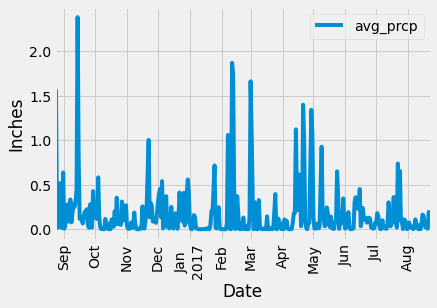

In [37]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')

In [38]:
# Use Pandas to print the summary statistics for the precipitation data
prcp_df.describe()

,avg_prcp
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


### Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order.

  * Which station has the highest number of observations?

  * Hint: You will need to use functions in your SQL query, such as `MAX()`, `MIN()`, `AVG()`, and `COUNT()` in your queries.

* Design a query to retrieve the last 12 months of temperature observation data (TOBS).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

In [42]:
# Design a query to calculate the total number of stations
query = '''
SELECT COUNT(*) AS station_count
FROM station
'''
station_df = pd.read_sql(query, conn)

# Save the answer as variable 'station_count' and print the answer in a sentence
# Use .values[0] to return only one value, not an array

station_count = station_df['station_count'].values[0]

print(f'There are {station_count} stations in the DataBase')

There are 9 stations in the DataBase


In [44]:
# Design a query to find the most active stations
    # What are the most active stations? (i.e. what stations have the most rows)?
    # List the stations and the counts in descending order.
        # Join tables to get both station number and location
    
query = '''
SELECT 
    s.station AS station_code,
    s.name AS station_name,
    COUNT(*) AS station_count
FROM
    measurement m
    INNER JOIN station s
    ON m.station = s.station
GROUP BY
    s.station,
    s.name
ORDER BY
    station_count DESC
'''

active_stations_df = pd.read_sql(query, conn)
active_stations_df.head()

,station_code,station_name,station_count
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612


In [48]:
# Which station has the highest number of observations?

active_stations_df.sort_values('station_count', ascending=False, inplace=True)
most_active_station = active_stations_df['station_code'].values[0]
print(f' Station {most_active_station} has the highest number of observations')

 Station USC00519281 has the highest number of observations


In [51]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
    # above data has already been ordered, but just in case, resort and order descending
    
active_stations_df.sort_values('station_count', ascending=False, inplace=True)
most_active_station = active_stations_df['station_code'].values[0]

query = f'''
    SELECT
        MIN(tobs) AS min_tobs,
        MAX(tobs) AS max_tobs,
        AVG(tobs) AS avg_tobs
    FROM measurement
    WHERE station = '{most_active_station}'
'''

temperature_observations_df = pd.read_sql(query, conn)
temperature_observations_df

,min_tobs,max_tobs,avg_tobs
0,54.0,85.0,71.663781


In [53]:
# Choose the station with the highest number of temperature observations.
    # Highest # of temp. obs. = '{most_active_station}'
# Query the last 12 months of temperature observation data for this station 
    # Last 12 months of temp. obs. = date >= (SELECT DATE(MAX(date), '-1 year') FROM measurement)
    
query = f'''
    SELECT tobs
    FROM measurement
    WHERE date>= (SELECT DATE(MAX(date), '-1 year') FROM measurement)
    AND station = '{most_active_station}'
'''

temp_obs_df = pd.read_sql(query, conn)
temp_obs_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


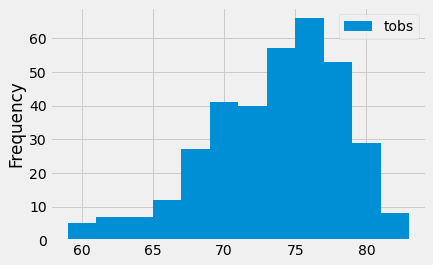

In [54]:
# Plot the results as a histogram with 'bins=12'

temp_obs_df.plot.hist(bins=12)

### Climate APP
* Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.
    * Use Flask to create your routes.
* Routes
    */
        * Home page.
        * List all routes that are available.
    * /api/v1.0/precipitation
        * Convert the query results to a dictionary using date as the key and prcp as the value.
        * Return the JSON representation of your dictionary.
    * /api/v1.0/stations
        * Return a JSON list of stations from the dataset.
    * /api/v1.0/tobs
        * Query the dates and temperature observations of the most active station for the last year of data.
        * Return a JSON list of temperature observations (TOBS) for the previous year.
    * /api/v1.0/<start> and /api/v1.0/<start>/<end>
        * Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
        * When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
        * When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.

* Hints
    * You will need to join the station and measurement tables for some of the queries.
    * Use Flask jsonify to convert your API data into a valid JSON response object.




## Part 3 - Data Analysis Assignment
### Temperature Analysis I
* Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in , for example, June and December?
* You may either use SQLAlchemy or pandas's 'read_csv()' to perform this portion
* Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature
* Use the t-test to determine whether the differece in the means, if any, is statistically significant. Willyou use a paired t-tesr, or an unpaired t-test? Why?

In [163]:
temp_measurement = pd.read_csv(r"C:\Users\RebekahDSK\OneDrive\Desktop\SQLalchemy_Challenge\measurements.csv")

In [170]:
average_temps = temp_measurement.groupby('month').mean()
average_temps

,prcp,tobs
month,,
1,0.129975,68.726115
2,0.137271,69.442236
3,0.204227,70.059067
4,0.150639,72.357268
5,0.145677,73.680900
6,0.136360,74.944118
7,0.167922,76.082408
8,0.146662,76.412454
9,0.164249,76.164865


### Temperature Analysis II


* The starter notebook contains a function called `calc_temps` that will accept a start date and end date in the format %Y-%m-%d. The function will return the minimum, average, and maximum temperatures for that range of dates.
* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").
* Plot the min, avg, and max temperature from your previous query as a bar chart.
    * Use the average temperature as the bar height.
    * Use the peak-to-peak (TMAX-TMIN) value as the y error bar (YERR).

In [55]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    query = f'''
        SELECT
            MIN(tobs) AS min_tobs,
            MAX(tobs) AS max_tobs,
            AVG(tobs) AS avg_tobs
        FROM measurement
        WHERE date BETWEEN '{start_date}' AND '{end_date}'
'''
    temp_stats_df = pd.read_sql(query, conn)
    temp_stats = tuple(temp_stats_df.values[0])
    
    return temp_stats

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

(62.0, 74.0, 69.57142857142857)


In [57]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

print(calc_temps('2011-02-28', '2011-03-05'))

(61.0, 75.0, 69.75510204081633)


In [62]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip = (calc_temps('2011-02-28', '2011-03-05'))


In [107]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

total_rainfall_df = pd.read_sql('select s.name, m.station, m.prcp, s.elevation, s.latitude, s.longitude from (Select station\
, ROUND(sum(prcp),2) prcp from measurement where date between "2016-08-23" and "2017-08-23" group by station) m \
join station s on m.station=s.station order by m.prcp desc', conn)
total_rainfall_df

,name,station,prcp,elevation,latitude,longitude
0,"MANOA LYON ARBO 785.2, HI US",USC00516128,147.81,152.4,21.33310,-157.80250
1,"WAIHEE 837.5, HI US",USC00519281,70.03,32.9,21.45167,-157.84889
2,"KANEOHE 838.1, HI US",USC00513117,48.51,14.6,21.42340,-157.80150
3,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,38.01,19.5,21.33556,-157.71139
4,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,33.24,7.0,21.52130,-157.83740
5,"WAIKIKI 717.2, HI US",USC00519397,16.09,3.0,21.27160,-157.81680
6,"PEARL CITY, HI US",USC00517948,4.59,11.9,21.39340,-157.97510


In [139]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A DataFrame containing the daily normals, tmin, tavg, and tmax
    
    """
    
    query = '''
    SELECT min(tobs), avg(tobs), max(tobs)
    FROM measurement
    WHERE date LIKE "%01-%01"
    '''
    
    daily_normals_df = pd.read_sql(query, conn)
    daily_normals = tuple(daily_normals_df.values[0])
    
    return daily_normals
    
    
daily_normals("04-12")

(62.0, 69.15384615384616, 77.0)

In [140]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
# dt.datetime creates a date in the yyyy-mm-dd format
beginning = dt.datetime(2021, 4, 4)
end = dt.datetime(2021, 4, 18)

In [141]:
# Use the start and end date to create a range of dates
# Add the range to a list called 'dates'
travel_dates = pd.date_range(beginning, end).tolist()
travel_dates
dates=[]

In [142]:
# Strip off the year and save a list of %m-%d strings
# dt.datetime.strftime changes the date format to mm-dd
for date in travel_dates:
    dates.append (dt.datetime.strftime(date, '%m-%d'))
so_tired=[]

In [143]:
# Loop through the list of %m-%d strings and calculate the normals for each date
for date in dates:
    so_tired.append(daily_normals(date))
print("During My Vacation: April 04 to April 18")
for things in so_tired:
    print(normal)

During My Vacation: April 04 to April 18
(62.0, 69.15384615384616, 77.0)
(62.0, 69.15384615384616, 77.0)
(62.0, 69.15384615384616, 77.0)
(62.0, 69.15384615384616, 77.0)
(62.0, 69.15384615384616, 77.0)
(62.0, 69.15384615384616, 77.0)
(62.0, 69.15384615384616, 77.0)
(62.0, 69.15384615384616, 77.0)
(62.0, 69.15384615384616, 77.0)
(62.0, 69.15384615384616, 77.0)
(62.0, 69.15384615384616, 77.0)
(62.0, 69.15384615384616, 77.0)
(62.0, 69.15384615384616, 77.0)
(62.0, 69.15384615384616, 77.0)
(62.0, 69.15384615384616, 77.0)


In [149]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# np.ravel flattens an array, so [1,2,3], [4,5,6] becomes [1,2,3,4,5,6], add that to a list
normal_temperatures = []
for stuff in so_tired:
    normal_temperatures.append(np.ravel(stuff))
vacation_df = pd.DataFrame(normal_temperatures, columns=['Minimum Temperature', 'Average Temperature', 'Maximum Temperature'])
# use date.strftime to reformat the date back into yyyy-mm-dd
vacation_df.index=[str(date.strftime('%Y-%m-%d')) for date in travel_dates]
vacation_df

,Minimum Temperature,Average Temperature,Maximum Temperature
2021-04-04,62.0,69.153846,77.0
2021-04-05,62.0,69.153846,77.0
2021-04-06,62.0,69.153846,77.0
2021-04-07,62.0,69.153846,77.0
2021-04-08,62.0,69.153846,77.0
2021-04-09,62.0,69.153846,77.0
2021-04-10,62.0,69.153846,77.0
2021-04-11,62.0,69.153846,77.0
2021-04-12,62.0,69.153846,77.0
2021-04-13,62.0,69.153846,77.0


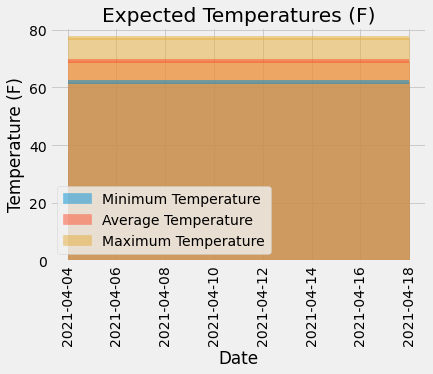

In [159]:
# Plot the daily normals as an area plot with `stacked=False`
vacation_df.plot.area(stacked=False, rot=90)
plt.yticks
plt.ylabel("Temperature (F)")
plt.xlabel("Date")
plt.title('Expected Temperatures (F)')
plt.show()